In [1]:
import numpy as np
import cv2
import os
from os import listdir
import tensorflow as tf
import pickle
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
default_image_size = tuple((256, 256))
resized_image_size = tuple((227,227))
image_size = 0
directory_root = 'E:\\PROJECT_MODIFIED\\Augmented\\Resized\\227x227'

In [4]:
# Function to convert image to array.
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, resized_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
# Reading the images from the dataset folder.
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed!")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing BANANA_DISEASED_LEAF SPOT ...
[INFO] Processing BANANA_HEALTHY ...
[INFO] Processing BLACK-PEPPER_DISEASED_ANTHRACNOSE ...
[INFO] Processing BLACK-PEPPER_HEALTHY ...
[INFO] Processing BRINJAL_DISEASED_BLIGHT ...
[INFO] Processing BRINJAL_DISEASED_COMPLEX ...
[INFO] Processing BRINJAL_DISEASED_LEAF CURL ...
[INFO] Processing BRINJAL_DISEASED_LEAF SPOT ...
[INFO] Processing BRINJAL_DISEASED_MOSAIC ...
[INFO] Processing BRINJAL_HEALTHY ...
[INFO] Processing CABBAGE_HEALTHY ...
[INFO] Processing CASAVA_HEALTHY ...
[INFO] Processing CASSAVA_DISEASED_LEAF SPOT ...
[INFO] Processing CASSAVA_DISEASED_MOSAIC ...
[INFO] Processing CHILLI-PEPPER_CHLOROSIS ...
[INFO] Processing CHILLI-PEPPER_DISEASED_LEAF CURL ...
[INFO] Processing CHILLI-PEPPER_DISEASED_LEAF SPOT ...
[INFO] Processing CHILLI-PEPPER_DISEASED_MOSIAC ...
[INFO] Processing CHILLI-PEPPER_HEALTHY ...
[INFO] Processing CITRUS_DISEASED_LEAVE SPOT ...
[INFO] Processing CITRUS_DISEASED_MITE ...
[

In [6]:
# Assign the classes to images.
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
n_classes = len(label_binarizer.classes_)

In [7]:
from collections import Counter
print(Counter(label_list).keys() )
print(Counter(label_list).values())

dict_keys(['BANANA_DISEASED_LEAF SPOT', 'BANANA_HEALTHY', 'BLACK-PEPPER_DISEASED_ANTHRACNOSE', 'BLACK-PEPPER_HEALTHY', 'BRINJAL_DISEASED_BLIGHT', 'BRINJAL_DISEASED_COMPLEX', 'BRINJAL_DISEASED_LEAF CURL', 'BRINJAL_DISEASED_LEAF SPOT', 'BRINJAL_DISEASED_MOSAIC', 'BRINJAL_HEALTHY', 'CABBAGE_HEALTHY', 'CASAVA_HEALTHY', 'CASSAVA_DISEASED_LEAF SPOT', 'CASSAVA_DISEASED_MOSAIC', 'CHILLI-PEPPER_CHLOROSIS', 'CHILLI-PEPPER_DISEASED_LEAF CURL', 'CHILLI-PEPPER_DISEASED_LEAF SPOT', 'CHILLI-PEPPER_DISEASED_MOSIAC', 'CHILLI-PEPPER_HEALTHY', 'CITRUS_DISEASED_LEAVE SPOT', 'CITRUS_DISEASED_MITE', 'CITRUS_DISEASED_MOLD', 'CITRUS_DISEASED_YELLOWING', 'CITRUS_HEALTH', 'GUAVA_DISEASED_BLIGHT', 'GUAVA_DISEASED_HEALTHY', 'GUAVA_DISEASED_LEAF SPOT', 'GUAVA_DISEASED_PEST', 'GUAVA_DISEASED_SOOTY MOLD', 'GUAVA_DISEASES_ANTHRACNOSE', 'OKRA_DISEASED_LEAF CUEL', 'OKRA_DISEASED_LEAF SPOT', 'OKRA_DISEASED_MOSAIC', 'OKRA_HEALTHY', 'PAPAYA_HEALTHY'])
dict_values([228, 198, 132, 264, 42, 186, 108, 618, 96, 1212, 498, 42, 

In [8]:
labels = len(label_binarizer.classes_)
print(labels)

35


In [9]:
# Convert the array to a NumPy list and normalise it.
np_image_list = np.array(image_list, dtype = np.float16) / 225.0
print("Total Images" , " : " ,len(np_image_list))
del image_list

Total Images  :  11064


In [10]:
print("[INFO] Spliting data into train set and test set ...")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size = 0.2, random_state = 42) 
print("[INFO] Spliting complete!")
print("x_Train" ," : " , len(x_train))
print("y_Train" ," : " , len(y_train))
print("x_Test" ," : " , len(x_test))
print("y_Test" ," : " , len(y_test))
del np_image_list
del image_labels

[INFO] Spliting data into train set and test set ...
[INFO] Spliting complete!
x_Train  :  8851
y_Train  :  8851
x_Test  :  2213
y_Test  :  2213


In [11]:
aug = ImageDataGenerator()

In [12]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2
import os, gc, sys, glob
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model, load_model
from keras import applications
from keras.callbacks import ReduceLROnPlateau

from keras.layers import LayerNormalization
from keras.metrics import categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [13]:
MODEL_NAME = "OD_ENV2B1_AD.h5"
img_rows, img_cols, img_channel = 227,227, 3

base_model =tf.keras.applications.EfficientNetV2B1(
    include_top=False,
    input_shape=(img_rows, img_cols, img_channel),
    pooling='avg',
)

print(base_model.summary())


Model: "efficientnetv2-b1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 227, 227, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 227, 227, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 114, 114, 32  864         ['normalization[0

 ivation)                                                                                         
                                                                                                  
 block2c_project_conv (Conv2D)  (None, 57, 57, 32)   4096        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 57, 57, 32)  128         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_drop (Dropout)         (None, 57, 57, 32)   0           ['block2c_project_bn[0][0]']     
                                                                                                  
 block2c_a

 agePooling2D)                                                                                    
                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 192)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 12)     2316        ['block4a_se_reshape[0][0]']     
                                                                                                  
 block4a_se_expand (Conv2D)     (None, 1, 1, 192)    2496        ['block4a_se_reduce[0][0]']      
                                                                                                  
 block4a_se_excite (Multiply)   (None, 15, 15, 192)  0           ['block4a_activation[0][0]',     
                                                                  'block4a_se_expand[0][0]']      
          

                                                                                                  
 block4c_project_conv (Conv2D)  (None, 15, 15, 96)   36864       ['block4c_se_excite[0][0]']      
                                                                                                  
 block4c_project_bn (BatchNorma  (None, 15, 15, 96)  384         ['block4c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4c_drop (Dropout)         (None, 15, 15, 96)   0           ['block4c_project_bn[0][0]']     
                                                                                                  
 block4c_add (Add)              (None, 15, 15, 96)   0           ['block4c_drop[0][0]',           
                                                                  'block4b_add[0][0]']            
          

                                                                                                  
 block5b_expand_conv (Conv2D)   (None, 15, 15, 672)  75264       ['block5a_project_bn[0][0]']     
                                                                                                  
 block5b_expand_bn (BatchNormal  (None, 15, 15, 672)  2688       ['block5b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5b_expand_activation (Act  (None, 15, 15, 672)  0          ['block5b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5b_dwconv2 (DepthwiseConv  (None, 15, 15, 672)  6048       ['block5b_expand_activation[0][0]
 2D)      

                                                                                                  
 block5d_expand_activation (Act  (None, 15, 15, 672)  0          ['block5d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5d_dwconv2 (DepthwiseConv  (None, 15, 15, 672)  6048       ['block5d_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5d_bn (BatchNormalization  (None, 15, 15, 672)  2688       ['block5d_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5d_a

 2D)                                                             ']                               
                                                                                                  
 block5f_bn (BatchNormalization  (None, 15, 15, 672)  2688       ['block5f_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5f_activation (Activation  (None, 15, 15, 672)  0          ['block5f_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5f_se_squeeze (GlobalAver  (None, 672)         0           ['block5f_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block6b_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block6b_se_squeeze[0][0]']     
                                                                                                  
 block6b_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block6b_se_reshape[0][0]']     
                                                                                                  
 block6b_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block6b_se_reduce[0][0]']      
                                                                                                  
 block6b_se_excite (Multiply)   (None, 8, 8, 1152)   0           ['block6b_activation[0][0]',     
                                                                  'block6b_se_expand[0][0]']      
                                                                                                  
 block6b_p

 block6d_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block6d_se_reduce[0][0]']      
                                                                                                  
 block6d_se_excite (Multiply)   (None, 8, 8, 1152)   0           ['block6d_activation[0][0]',     
                                                                  'block6d_se_expand[0][0]']      
                                                                                                  
 block6d_project_conv (Conv2D)  (None, 8, 8, 192)    221184      ['block6d_se_excite[0][0]']      
                                                                                                  
 block6d_project_bn (BatchNorma  (None, 8, 8, 192)   768         ['block6d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6d_d

 block6f_project_conv (Conv2D)  (None, 8, 8, 192)    221184      ['block6f_se_excite[0][0]']      
                                                                                                  
 block6f_project_bn (BatchNorma  (None, 8, 8, 192)   768         ['block6f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6f_drop (Dropout)         (None, 8, 8, 192)    0           ['block6f_project_bn[0][0]']     
                                                                                                  
 block6f_add (Add)              (None, 8, 8, 192)    0           ['block6f_drop[0][0]',           
                                                                  'block6e_add[0][0]']            
                                                                                                  
 block6g_e

 block6h_drop (Dropout)         (None, 8, 8, 192)    0           ['block6h_project_bn[0][0]']     
                                                                                                  
 block6h_add (Add)              (None, 8, 8, 192)    0           ['block6h_drop[0][0]',           
                                                                  'block6g_add[0][0]']            
                                                                                                  
 block6i_expand_conv (Conv2D)   (None, 8, 8, 1152)   221184      ['block6h_add[0][0]']            
                                                                                                  
 block6i_expand_bn (BatchNormal  (None, 8, 8, 1152)  4608        ['block6i_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6i_e

In [14]:
outputs = tf.keras.layers.Dense(labels, activation='softmax')(base_model.output)
model = tf.keras.Model(inputs=base_model.input, outputs=outputs)

In [15]:
EPOCHS = 100
INIT_LR = 1e-4
Decay = 1e-5

# compile the model
opt = opt = tf.keras.optimizers.Adam(learning_rate=INIT_LR)

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

print("[INFO] Training network...")

# Train
checkpoint = ModelCheckpoint(MODEL_NAME, monitor = 'val_accuracy', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'max')


history = model.fit(
    aug.flow(x_train, y_train, shuffle = False),
    validation_data = (x_test, y_test),
    validation_freq=1,
    batch_size = 32,
    callbacks = [checkpoint],
    epochs = EPOCHS,)

[INFO] Training network...
Epoch 1/100
277/277 [==============================] - ETA: 0s - loss: 2.1727 - accuracy: 0.4401
Epoch 1: val_accuracy improved from -inf to 0.47492, saving model to OD_ENV2B1_AD.h5
277/277 [==============================] - 91s 244ms/step - loss: 2.1727 - accuracy: 0.4401 - val_loss: 1.8957 - val_accuracy: 0.4749
Epoch 2/100
277/277 [==============================] - ETA: 0s - loss: 0.9858 - accuracy: 0.7204
Epoch 2: val_accuracy improved from 0.47492 to 0.68369, saving model to OD_ENV2B1_AD.h5
277/277 [==============================] - 55s 198ms/step - loss: 0.9858 - accuracy: 0.7204 - val_loss: 1.0110 - val_accuracy: 0.6837
Epoch 3/100
277/277 [==============================] - ETA: 0s - loss: 0.5694 - accuracy: 0.8297
Epoch 3: val_accuracy improved from 0.68369 to 0.71667, saving model to OD_ENV2B1_AD.h5
277/277 [==============================] - 54s 196ms/step - loss: 0.5694 - accuracy: 0.8297 - val_loss: 0.9171 - val_accuracy: 0.7167
Epoch 4/100
277/277

277/277 [==============================] - 53s 190ms/step - loss: 0.0116 - accuracy: 0.9976 - val_loss: 0.2169 - val_accuracy: 0.9516
Epoch 29/100
277/277 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9940
Epoch 29: val_accuracy did not improve from 0.96927
277/277 [==============================] - 53s 193ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.3613 - val_accuracy: 0.9146
Epoch 30/100
277/277 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9975
Epoch 30: val_accuracy did not improve from 0.96927
277/277 [==============================] - 53s 191ms/step - loss: 0.0103 - accuracy: 0.9975 - val_loss: 0.1670 - val_accuracy: 0.9584
Epoch 31/100
277/277 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 0.9972
Epoch 31: val_accuracy did not improve from 0.96927
277/277 [==============================] - 54s 193ms/step - loss: 0.0114 - accuracy: 0.9972 - val_loss: 0.1712 - val_accuracy: 0.9602
Epoch 32/100
2

277/277 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9980
Epoch 57: val_accuracy did not improve from 0.97018
277/277 [==============================] - 53s 192ms/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.4045 - val_accuracy: 0.9182
Epoch 58/100
277/277 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 0.9984
Epoch 58: val_accuracy improved from 0.97018 to 0.97108, saving model to OD_ENV2B1_AD.h5
277/277 [==============================] - 54s 194ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.1401 - val_accuracy: 0.9711
Epoch 59/100
277/277 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 0.9981
Epoch 59: val_accuracy did not improve from 0.97108
277/277 [==============================] - 53s 190ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.3437 - val_accuracy: 0.9282
Epoch 60/100
277/277 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9993
Epoch 60: val_accuracy imp

277/277 [==============================] - 52s 188ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.5773 - val_accuracy: 0.8762
Epoch 86/100
277/277 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9989
Epoch 86: val_accuracy did not improve from 0.97695
277/277 [==============================] - 52s 188ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.1604 - val_accuracy: 0.9625
Epoch 87/100
277/277 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9994
Epoch 87: val_accuracy did not improve from 0.97695
277/277 [==============================] - 51s 186ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.1315 - val_accuracy: 0.9724
Epoch 88/100
277/277 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995
Epoch 88: val_accuracy did not improve from 0.97695
277/277 [==============================] - 52s 186ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1095 - val_accuracy: 0.9770
Epoch 89/100
2

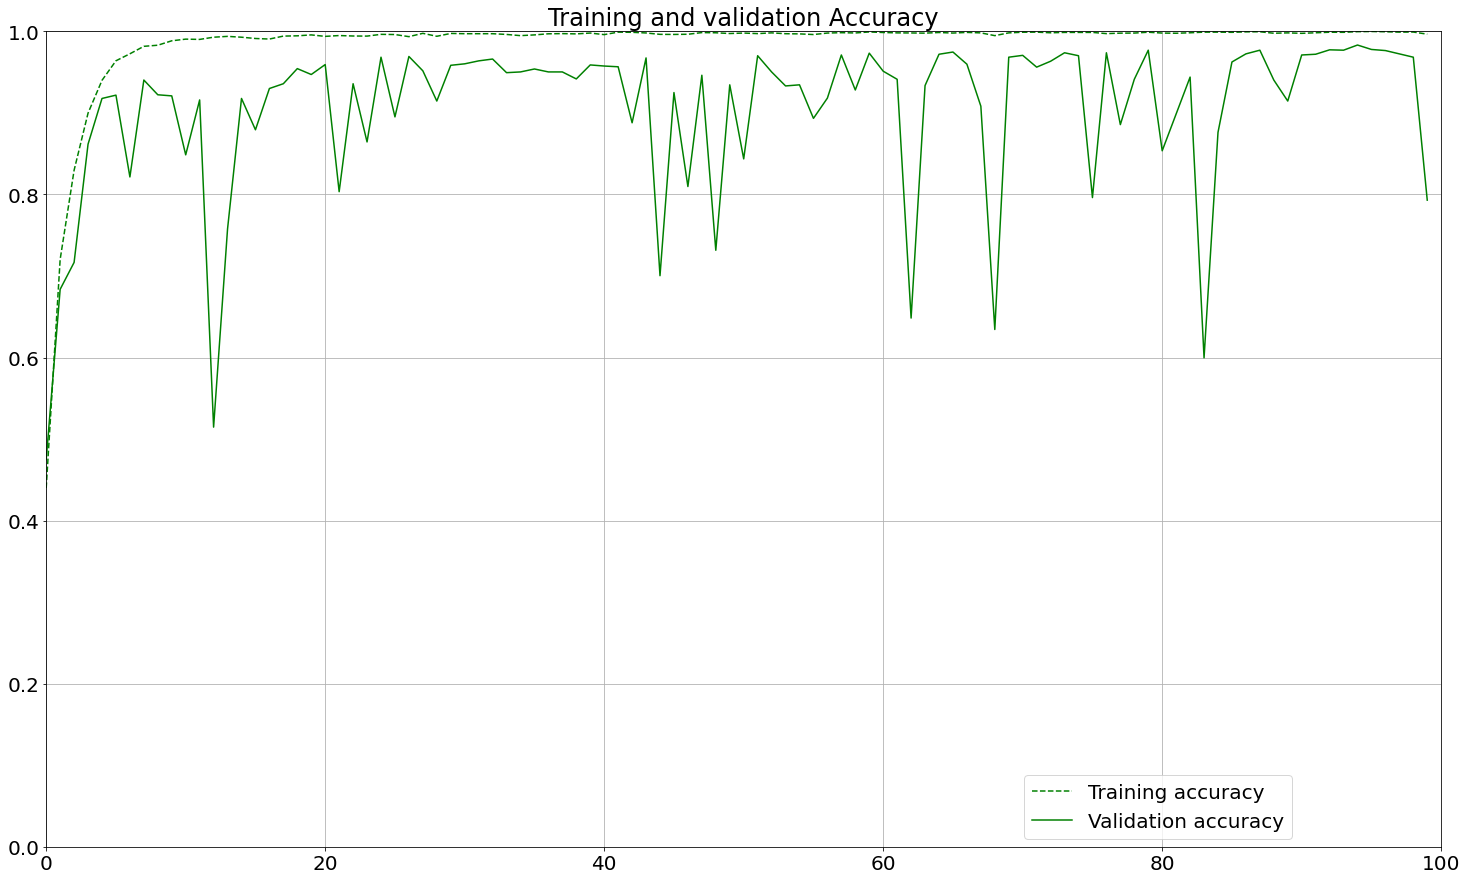

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(25, 15))
xmin = 0
xmax = 100
ymin = 0.0
ymax = 1.0
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
    
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])

plt.plot(epochs, acc, 'g--', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'g', label = 'Validation accuracy')
plt.title('Training and validation Accuracy')
plt.legend(bbox_to_anchor=(0.9, 0.1))

plt.grid()
plt.show()

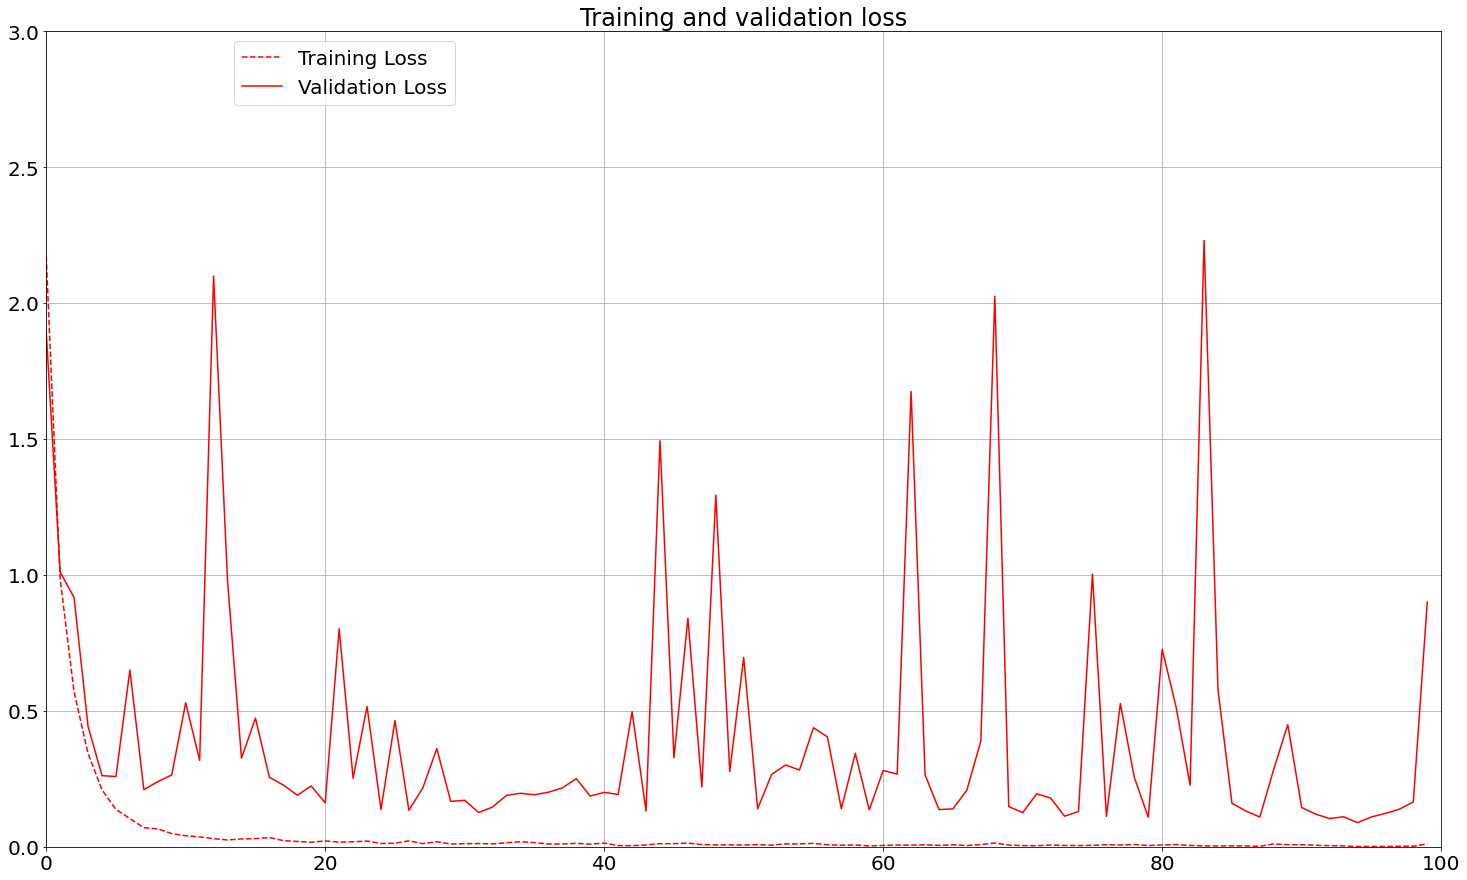

In [20]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(25, 15))
    #Plot the Result
xmin = 0
xmax = 100
ymin = 0.0
ymax = 3.0

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
    
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])

plt.plot(epochs, loss, 'r--', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend(bbox_to_anchor=(0.3, 1))

plt.grid()
plt.show()

In [21]:
model = load_model(MODEL_NAME)
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
70/70 [==============================] - 5s 52ms/step - loss: 0.0889 - accuracy: 0.9833
Test Accuracy: 98.3280599117279
